In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup
file_path = "/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/results.ods"
sheet_name = 2  # Sheet index starts from 0
columns = ['Blue Vel', 'Red Vel', 'All Vel', 'Blue Vel_err', 'Red Vel_err', 'All Vel_err']

# Read excel file
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns)
df = df.dropna(how='all')
df['Red Diff'] = df['Red Vel'] - df['All Vel']
df['Blue Diff'] = df['Blue Vel'] - df['All Vel']

# Axis values
blue_vel = df['Blue Vel']
red_vel = df['Red Vel']
all_vel = df['All Vel']
names = ['NGC_247 GCs obj1', 'NGC_247 GCs obj2', 'NGC_247 GCs obj3', 
         'NGC_247 GCs2 obj1', 'NGC_247 GCs2 obj2', 'NGC_247 GCs2 obj3',
         'DDO190', 
         'F8D1', 
         'M31_B336', 'M31_H12', 'M31_PANDAS_41',
         'Sextans_A_GC1']
blue_err = df['Blue Vel_err']
red_err = df['Red Vel_err']
all_err = df['All Vel_err']

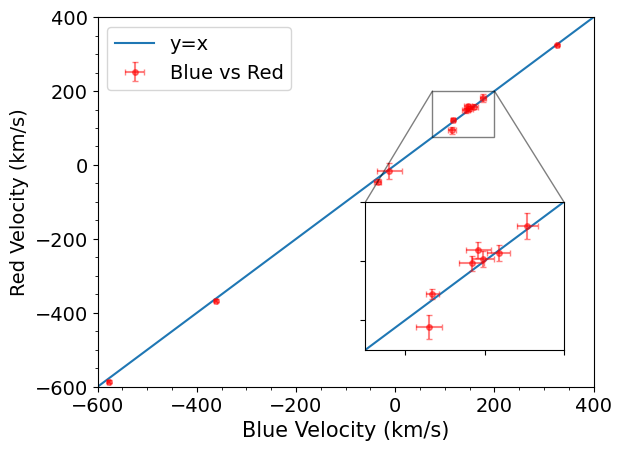

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

x = np.linspace(-700, 700, 100)

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()

plt.plot(x, x, label='y=x')
plt.errorbar(blue_vel, red_vel, xerr=blue_err, yerr=red_err, color='red', fmt='o', markersize=4, capsize=2, alpha=0.5, label='Blue vs Red')

# Create an inset axis for the zoomed-in section
axins = ax.inset_axes([0.54, 0.1, 0.4, 0.4])
axins.plot(x, x)
axins.errorbar(blue_vel, red_vel, xerr=blue_err, yerr=red_err, 
    color='red', fmt='o', markersize=4, capsize=2, alpha=0.5, label='Blue vs Red')
axins.set_xlim(75, 200)
axins.set_ylim(75, 200)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.xlabel('Blue Velocity (km/s)', fontsize=15)
plt.ylabel('Red Velocity (km/s)')
plt.xlim(-600, 400)
plt.ylim(-600, 400)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.legend()
plt.show()


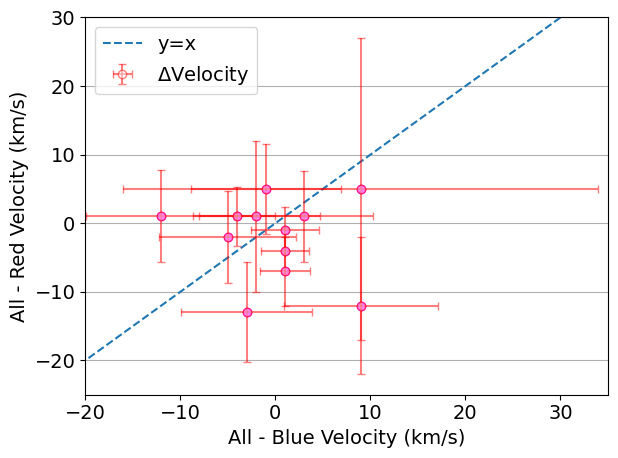

In [83]:
plt.plot(x, x, label='y=x', linestyle='--')
plt.errorbar(df['Blue Diff'], df['Red Diff'], xerr=blue_err, yerr=red_err, 
    label='$\Delta$Velocity', mfc='white', alpha=0.5,
    fmt='o', capsize=3, color='red')
plt.scatter(df['Blue Diff'], df['Red Diff'], color='magenta')
plt.xlabel('All - Blue Velocity (km/s)')
plt.ylabel('All - Red Velocity (km/s)')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.xlim(-20, 35)
plt.ylim(-25, 30)
plt.tight_layout()
plt.show()


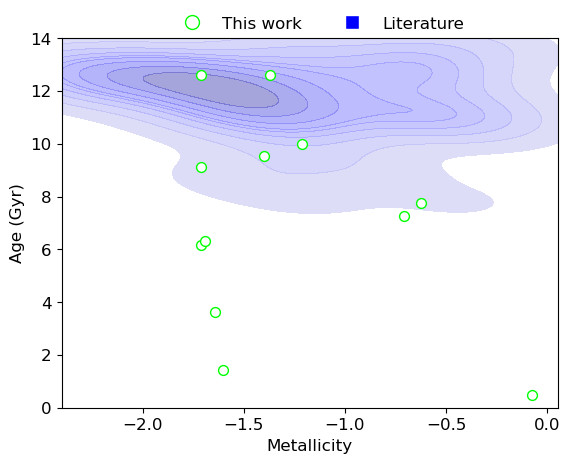

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

file_path = "/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_SP/results.ods"
sheet_name = 0  # Sheet index starts from 0
columns = ['Age (Gyr)', 'Metallicity', 'Object']

df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns)
df.dropna(inplace=True)

# Forbes 2022 -- https://ui.adsabs.harvard.edu/abs/2022MNRAS.512..802F/abstract
NGC_2403_AGE = [12.5, 7.8, 9, 9.3, 8.6, 10.8]
NGC_2403_MET = [-2.2, -1.2, -1.35, -1.15, -1.6, -1.5]

# Reico-Blanco 2018 -- https://www.aanda.org/articles/aa/full_html/2018/12/aa33179-18/aa33179-18.html
RB_AGE = [11.75, 11.50, 10.75, 10.75, 11.00, 11.00, 11.50, 12.25, 12.00, 12.50, 12.25, 12.25, 11.75, 12.50, 12.50, 11.50, 10.75, 12.25, 12.25, 11.50, 12.75, 12.00, 12.00, 13.00, 11.75, 11.25, 12.75, 10.75, 12.5, 11.00, 13.00, 12.25, 10.75, 12.75, 12.50, 11.75, 11.25, 11.00, 11.25, 12.50, 12.75, 11.75, 12.50, 12.50, 12.50, 12.75, 8.30, 13.00, 11.00, 11.50, 11.25, 12.75, 11.75, 13.00, 12.00, 9.00, 13.00, 7.75, 11.25, 10.75, 10.50]
RB_MET = [-0.76, -1.32, -1.30, -1.27, -1.18, -1.18, -1.51, -1.78, -2.27, -1.89, -2.06, -2.30, -1.50, -1.70, -2.31, -1.33, -0.29, -1.63, -1.98, -1.18, -1.82, -1.03, -1.58, -1.33, -1.57, -0.37, -2.35, -0.62, -1.07, -0.59, -1.99, -2.15, -0.46, -1.79, -1.82, -1.50, -0.42, -0.59, -0.76, -1.70, -1.62, -1.44, -1.26, -1.11, -1.55, -2.00, 0.29, -1.93, -0.82, -1.48, -1.46, -2.33, -1.66, -2.33, -1.74, -0.81, -2.34, -0.45, -1.64, -1.78, -1.2]

# Nunez 2024 -- https://arxiv.org/pdf/2401.02519.pdf
NUNEZ_AGE = [12.25, 10.00, 12.75, 13.75, 11.50, 13.75, 12.25, 13.75, 12.75, 12.75, 13.75, 12.75, 13.25, 12.75, 13.25, 13.75, 13.25]
NUNEZ_MET = [-0.64, -1.25, -0.64, -0.33, -0.33, -1.25, -1.25, -1.25, -0.64, -0.64, -0.33, -0.64, -1.25, -0.64, -0.64, -0.64, -0.64]

lit_age = NGC_2403_AGE + RB_AGE + NUNEZ_AGE
lit_met = NGC_2403_MET + RB_MET + NUNEZ_MET

this_work = Line2D([0], [0], marker='o', color='w', label='This work', markerfacecolor='white', markersize=10, markeredgecolor='lime')
literature = Line2D([0], [0], marker='s', color='w', label='Literature', markerfacecolor='blue', markersize=10)

# plt.scatter(NGC_2403_MET, NGC_2403_AGE, label='Forbes 2022', marker='^', color='magenta')
# plt.scatter(RB_MET, RB_AGE, label='Reico-Blanco 2018', marker='*', color='cyan')
# plt.scatter(NUNEZ_MET, NUNEZ_AGE, label='Nunez 2024', marker='x', color='red')
# plt.scatter(lit_met, lit_age, label='Literature', marker='^', color='blue')
sns.kdeplot(x=lit_met, y=lit_age, fill=True, color='blue', alpha=0.5)
plt.scatter(df['Metallicity'], df['Age (Gyr)'], label='This work', edgecolor='lime', facecolor='white', s=50)
plt.xlabel('Metallicity', fontsize=12)
plt.ylabel('Age (Gyr)', fontsize=12)
# plt.axhline(y=8, color='black', linestyle='--')
# plt.fill_between([-3, 0.5], [8, 8], [15, 15], color='blue', alpha=0.1)
# plt.fill_between([-3, 0.5], [8, 8], [0, 0], color='red', alpha=0.1)
# for met, age, name in zip(df['Metallicity'], df['Age (Gyr)'], df['Object']):
#     if age > 6:
#         plt.text(met, age, name, fontsize=8)
plt.xlim(-2.4, 0.05)
plt.ylim(0, 14)
plt.legend(handles=[this_work, literature], bbox_to_anchor=(0.2, 1.1), loc='upper left', fancybox=True, ncol=2, fontsize=12, frameon=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()